In [51]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pathlib import Path

In [52]:
folder_path = 'Graph Images'

os.makedirs(folder_path)

In [2]:
# Read the file from the Resources Folder
ds_salaries_1 = pd.read_csv("Resources/ds_salaries-1.csv")
ds_salaries_2 = pd.read_csv("Resources/ds_salaries-2.csv")

ds_combined_salaries= pd.concat([ds_salaries_1,ds_salaries_2])
ds_combined_salaries = ds_combined_salaries.drop_duplicates()


# Drop any index column from the combined csv file
ds_combined_salaries = ds_combined_salaries.drop(columns=['Unnamed: 0'])
ds_combined_salaries.count()

work_year             3191
experience_level      3191
employment_type       3191
job_title             3191
salary                3191
salary_currency       3191
salary_in_usd         3191
employee_residence    3191
remote_ratio          3191
company_location      3191
company_size          3191
dtype: int64

In [3]:
us_ds_salaries = ds_combined_salaries[
    (ds_combined_salaries['company_location'] == 'US') &
    (ds_combined_salaries['employee_residence'] == 'US')
]
us_ds_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
599,2022,MI,FT,Data Scientist,130000,USD,130000,US,100,US,M
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M


In [4]:
# Compairison to the US Avg. Salary by year
# Bar graph

In [5]:
us_ds_average_salaries = us_ds_salaries.groupby('work_year')['salary'].mean().map('${:.2f}'.format)
us_ds_average_salaries

work_year
2020    $156237.25
2021    $150463.82
2022    $148685.78
2023    $158893.08
Name: salary, dtype: object

In [6]:
us_ds_average_salaries_df = us_ds_salaries.groupby('work_year')['salary'].mean().map('${:.2f}'.format).to_frame(name='average_salary')
us_ds_average_salaries_df

,average_salary
work_year,
2020,$156237.25
2021,$150463.82
2022,$148685.78
2023,$158893.08


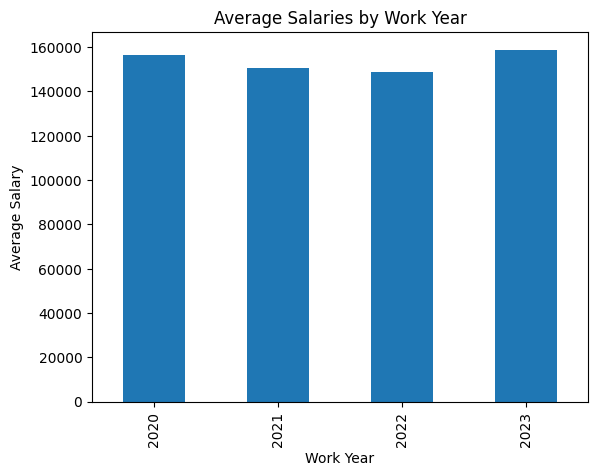

<Figure size 640x480 with 0 Axes>

In [56]:
# Because I formatted the inforation to currency I had to remove it in order for the graph to work
us_ds_average_salaries_df.plot(kind='bar', legend=False)
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Work Year')
plt.show()
plt.savefig('Graph Images/Average Salaries by Work Year.png')


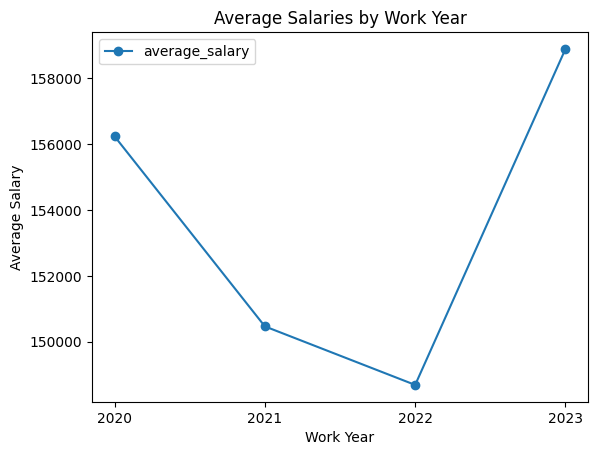

<Figure size 640x480 with 0 Axes>

In [57]:
us_ds_average_salaries_df.plot(kind='line', marker='o')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Work Year')
plt.xticks(us_ds_average_salaries_df.index, ['2020', '2021', '2022', '2023'])
plt.show()
plt.savefig('Graph Images/Average Salaries by Work Year Line.png')

In [9]:
job_title_average_salaries = us_ds_salaries.groupby('job_title')['salary'].mean().reset_index()
job_title_average_salaries['salary'] = job_title_average_salaries['salary'].map('${:.2f}'.format)
job_title_average_salaries_sorted = job_title_average_salaries.sort_values('salary')
job_title_average_salaries_sorted = job_title_average_salaries_sorted.reset_index(drop=True)
job_title_average_salaries_sorted

,job_title,salary
0,Staff Data Scientist,$105000.00
1,Business Data Analyst,$107555.56
2,Data Operations Engineer,$110808.33
3,Data Science Consultant,$110900.00
4,Data Analytics Consultant,$113000.00
...,...,...
66,Big Data Engineer,$70000.00
67,Data Quality Analyst,$79295.00
68,BI Data Analyst,$80428.57
69,Data Operations Analyst,$90562.50


In [10]:
# Average salary per work schedule
# Bar Graph

In [40]:
us_emp_type_counts = us_ds_salaries['employment_type'].value_counts().to_frame(name='count')
us_emp_type_counts

,count
employment_type,
FT,2206
CT,11
PT,1


In [12]:
us_ds_emp_avg = us_ds_salaries.groupby('employment_type')['salary'].mean().map('${:.2f}'.format).to_frame(name='average_salary')
us_ds_emp_avg

,average_salary
employment_type,
CT,$175227.27
FT,$153317.22
PT,$34320.00


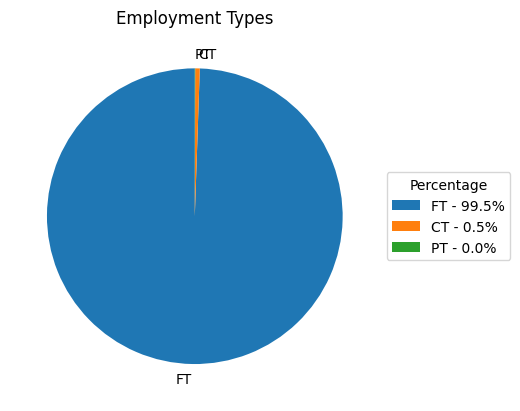

<Figure size 640x480 with 0 Axes>

In [58]:
# Calculate the percentages
percentages = (us_emp_type_counts['count'] / us_emp_type_counts['count'].sum()) * 100

# Create a pie chart
plt.pie(us_emp_type_counts['count'], labels=us_emp_type_counts.index, startangle=90)

plt.title('Employment Types')

# Create the legend with percentages
plt.legend(title='Percentage', loc='center left', bbox_to_anchor=(1, 0.5),
           labels=['{} - {:.1f}%'.format(label, percentage) for label, percentage in zip(us_emp_type_counts.index, percentages)])

plt.show()
plt.savefig('Graph Images/Employment Types Pie.png')

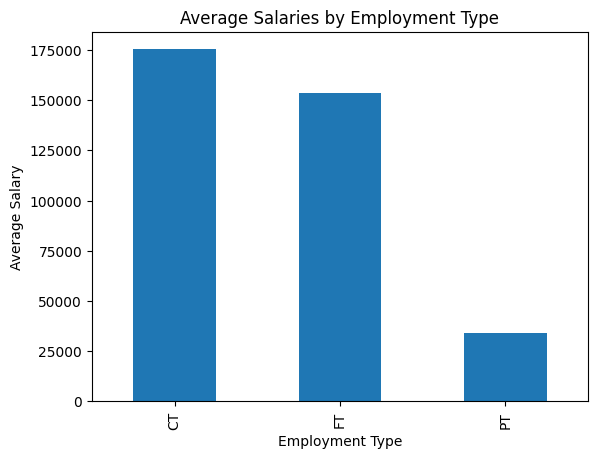

<Figure size 640x480 with 0 Axes>

In [60]:
us_ds_emp_avg.plot(kind='bar', legend=False)
plt.xlabel('Employment Type')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Employment Type')
plt.show()
plt.savefig('Graph Images/Average Salaries by Employment Type.png')

In [14]:
# Company who is paying more
# Bar graph

In [15]:
us_company_size = us_ds_salaries.groupby('company_size')['salary'].mean().map('${:.2f}'.format).to_frame(name='average_salary')
us_company_size

,average_salary
company_size,
L,$160772.69
M,$153203.94
S,$120403.73


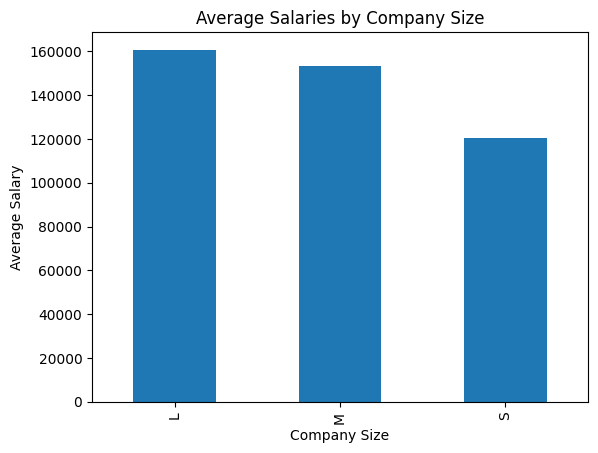

<Figure size 640x480 with 0 Axes>

In [62]:
us_company_size.plot(kind='bar', legend=False)
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Company Size')
plt.show()
plt.savefig('Graph Images/Average Salaries by Company Size.png')

In [18]:
# Work exp compairison
# Bar and line 

In [19]:
us_ds_exp_avg = us_ds_salaries.groupby('experience_level')['salary'].mean().map('${:.2f}'.format).to_frame(name='average_salary')
us_ds_exp_avg

,average_salary
experience_level,
EN,$102324.19
EX,$213307.64
MI,$132762.00
SE,$160678.93


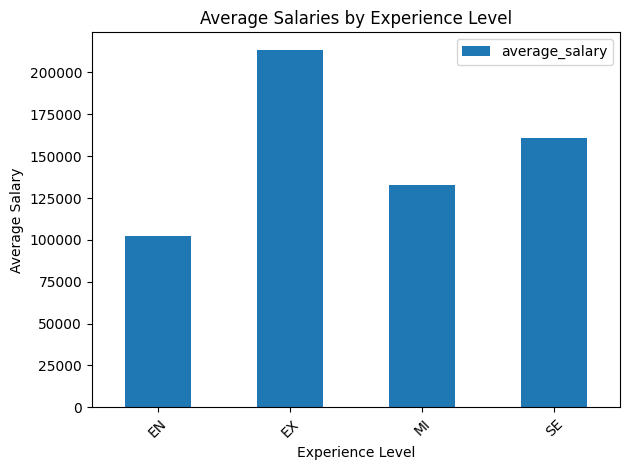

<Figure size 640x480 with 0 Axes>

In [64]:
us_ds_exp_avg.plot(kind='bar')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Experience Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('Graph Images/Average Salaries by Experience Level.png')


In [21]:
us_ds_exp_year_avg = us_ds_salaries.groupby(['experience_level', 'work_year'])['salary'].mean().map('${:.2f}'.format).to_frame(name='average_salary')
us_ds_exp_year_avg

average_salary
experience_level work_year               
EN               2020          $118000.00
                 2021           $88617.65
                 2022           $97490.08
                 2023          $111627.98
EX               2020          $325000.00
                 2021          $343142.86
                 2022          $195208.14
                 2023          $204880.19
MI               2020          $137639.13
                 2021          $139151.54
                 2022          $128124.96
                 2023          $134585.46
SE               2020          $208366.67
                 2021          $173734.38
                 2022          $154304.49
                 2023          $165798.48

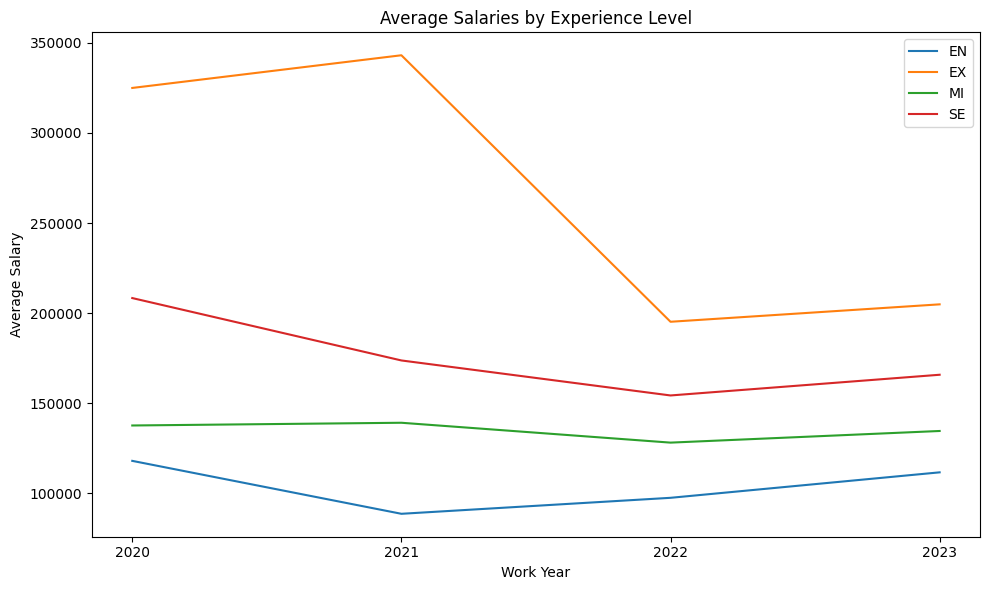

<Figure size 640x480 with 0 Axes>

In [65]:
plt.figure(figsize=(10, 6))

# Get unique work years and their corresponding index positions
work_years = us_ds_exp_year_avg['work_year'].unique()
work_years_index = np.arange(len(work_years))

for exp_level in us_ds_exp_year_avg['experience_level'].unique():
    data = us_ds_exp_year_avg[us_ds_exp_year_avg['experience_level'] == exp_level]
    plt.plot(work_years_index, data['average_salary'], label=exp_level)

plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Experience Level')

# Set x-axis ticks and labels
plt.xticks(work_years_index, work_years)

plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('Graph Images/Average Salaries by Experience Level Compairison.png')

In [23]:
# Compairing salary stats over the years
